<a href="https://colab.research.google.com/github/rfinn/computational_physics/blob/main/07_Lecture_air_resistance_Euler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modeling Air Resistance with the Euler Method
*written by Rose Finn*

*Adapted from Giordano and Nakanishi, [Computational Physics](https://www.physics.purdue.edu/~hisao/book/), Chapter 2*

# Overview

We can model the motion of any system if we know the net force.  Starting with Newton's second law in one dimension:

$$ F = m a$$

and we know acceleration is the change in velocity with time, $a = dv/dt$.

We can then solve the second law for acceleration:

$$ \frac{dv}{dt} = \frac{F}{m} $$

If we instead use differences instead of the derivative, we get:

$$ \frac{\Delta v}{\Delta t} = \frac{F}{m} $$

$$ \frac{v_{i+1} - v_i}{\Delta t} = \frac{F}{m} $$

We can solve for $v_{i+1}$:
$$ v_{i+1}  = v_i + \frac{F}{m} \Delta t $$

We can use this equation with the Euler method to approximate how velocity varies with time, if we know the net force $F$.

We will first develop code for an object without air resistance, and we will then model the addition of air resistance.




In [ ]:
# import numpy, pyplot, and math



# Part 0: But first - some practice with functions!

Write a function called **req_parallel** that takes in a list of resistors and calculates the equivalent resistance for when they are connected in parallel.

* input
  * list or array of resistor values
* function will
  * calculate Req for resistors connected in parallel
* return
  * the equivalent resistance

In [ ]:
# write your function req_parallel here



In [ ]:
# write code to test the output for 3 resistors (each 10 ohm) connected
# in parallel.  Solve the problem by hand first, and then use assert
# to check the value from your function



### Using your function

Goal: to determine the current being draw from the battery in the diagram below

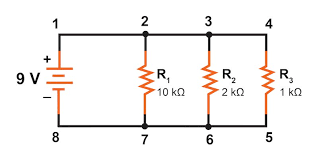

In the cell below:
* define your variables:
  * the values of $R_1, R_2, R_3$ based on the values in the picture
  * the battery voltage $V_{batt}$
* create an array with the values of the resistors.
* use your function to calculate the equivalent resistance, and save the output of your function as $Req$.
* Use Ohm's law to determine the current being drawn from the battery.
* Print out the current using a descriptive print statement.  Only print out 3 significant figures.

In [ ]:
# your code here


# Part 1: First step in modeling motion - ignore air resistance

To start off simply, let's model the motion of a bicylist without air resistance.

We can increment velocity at each time step if we know the acceleration:

$$ v_{i+1} = v_i + a \Delta t $$


In class we showed that we can determine the velocity of a bicyclist based on their power output $P$ and mass $m$ by combining the relations $a = \frac{F}{m}$ and $P = F v$:

$$ v_{i+1} = v_i + a \Delta t $$

$$ v_{i+1} = v_i + \frac{F}{m} \Delta t $$

$$ v_{i+1} = v_i + \frac{P}{m v_i} \Delta t $$





### Acceleration function

Write a function called **acceleration** that will do the following.

* input
  * $P$ - power output of cyclist
  * $m$ - mass of the cyclist and bicycle
  * $v$ - velocity

* function will calculate acceleration as
$$ a = \frac{P}{mv} $$

* return
  * $a$ - acceleration

In [ ]:
# your acceleration function here


### Write Your Initialize Function

Write a function called **initialize** that will do the following.
* input
  * v0 - initial velocity
  * tmax - total time to run simulation
  * dt - time step
* function should
  * calculate the number of steps nsteps as tmax/dt
  * make sure nsteps is an integer
  * set up arrays for velocity (v) and time (t) using `v=np.zeros(nsteps)`
  * set the first element of the velocity array to v0
* return
  * time and velocity arrays

In [ ]:
# initialize function here


### Write the Calculate Function

Write a function called **calculate** that will do the following.

* input
  * t - time array
  * v - velocity array
  * dt - time step
  * P - power output of cyclist
  * m - mass of cyclist
* function should
  * calculate velocity and time arrays using Euler method
  ```python
  v[i] = v[i-1] + acceleration(P,m,v[i-1]) * dt
  t[i] = t[i-1] + dt
  ```
* return
  * time and velocity arrays

In [ ]:
# your calculate function here



### Running your code

**Define your variables:**  Set the power output of the rider to 400 Watts.  Set the mass to 70 kg, and the initial velocity to 4 m/s.  Set the time step to 0.1 seconds, and run the calculation out to 200 seconds.

Then follow the comments to complete the Euler calculation and plot the results.


In [ ]:
############################################################
# This is your main program that will call the functions.
############################################################


# define variables and initial conditions

P =
m =
v0 =
dt =
tmax =

# call initialize and save output as t,v

# call calculate, and save output as tnoair,vnoair


# plot velocity vs time with a line
# be sure to label the x and y axes
# include a legend and figure title



### Reflection

Discuss the following questions with your neighbors, and summarize your thoughts below.

* What is the speed of the cyclist after 200 sec?  
* What is this speed in mph?  
* Is this a good model of the velocity of a cyclist as a function of time?  Why or why not?

**Your summary:**






In [ ]:
# in case you want to convert velocity here



# Part 2: Adding Air Resistance

We will make our model for the cyclist more realistic by adding the effects of air resistance.  We model the air resistance as having a quadratic dependence on velocity:
$$ F_{drag} = -B_2 v^2$$
where $B_2 = \frac{1}{2} C \rho A$.
* C = constant.  Set this equal to 0.5
* rho is the density of air.  Set this to 1.225 kg/m$^3$ for the density of air at sea level.
* A is the cross-sectional area of the cyclist, and we will use 0.33 m$^2$

### Define a new acceleration function

Write a function called **accel_resist**

* input
  * $P$ - power output of cyclist
  * $m$ - mass
  * $v$ - velocity
  * B2 - coefficient of air resistance

* function will calculate acceleration as
$$ a = \frac{P}{mv} - \frac{B_2}{m} v^2 $$

* return
  * $a$ - acceleration

In [ ]:
# your accel_resist function here


### Write a new function to calculate the Euler method

Write a function called **calculate_resist** that will do the following.

* input
  * t - time array
  * v - velocity array
  * dt - time step
  * P - power output of cyclist
  * m - mass of cyclist
  * B2 - coefficient of air resistance
* function should
  * calculate velocity and time arrays using Euler method
  ```python
  v[i] = v[i-1] + accel_resist(P,m,v[i-1],B2) * dt
  t[i] = t[i-1] + dt
  ```
* return
  * time and velocity arrays

In [ ]:
# your calculate_resist function


### Run your code with air resistance



In [ ]:
############################################################
# This is your main program that will call the functions.
############################################################

# set up variables

P =
m =
v0 =
dt =
tmax =
rho =
C =
A =

# calculate B2
B2 =

# call intialize from Part 1, save output as tnoair,vnoair

# calculate the Euler method with no air resistance
# save output as tnoair, vnoair

# call intialize, save output as tair,vair

# calculate the Euler method WITH air resistance
# save output as tair, vair


###############################################################
# PLOT YOUR RESULTS
###############################################################

# open a figure, and make your figure size (6,6)

# plot velocity with no air resistance vs time with a solid line

# plot velocity with air resistance vs time with a dashed line

# be sure to label the x and y axes

# include a legend and figure title



# Solution for comparison

Your figure should look like this.
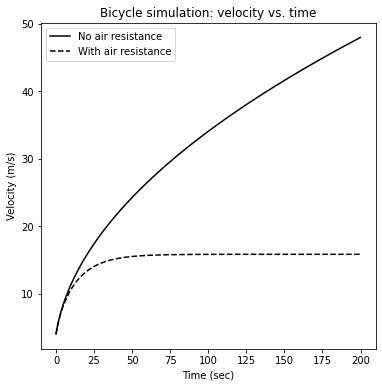

# Part 3: Wiki Summary

This notebook continues what we learned in Lab 3, so you can add this summary to your Lab 3 wiki.

* describe the Euler method and why it is useful
* describe how more complicated forces can be modeled
* describe how the accuracy of the results varies with the timestep
* how do you know what timestep to use?

# Part 4: BONUS!

1. Compare the exact solution for the velocity as a function of time without air resistance with the numerical results in Part 1 and show they agree.

2. Investigate the effect of varying the rider's frontal area on the ultimate velocity.  In particular, for a rider in the middle of a pack, the effective frontal area is about 30% less than for a rider in the front.  How much less energy does a rider in the pack expend than does one a the front, assuming they both move at a velocity of 13 m/s?